In [1]:
import os
os.chdir('/workspace/my_cyclegan/')

### Current best

In [3]:
!python test.py --name 'check_tanh'\
--old_generator True\
--save_img True\
--gpu_ids 0

----------------- Options ---------------
               batch_size: 5                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
             data_shuffle: False                         
                 dataroot: /all_data/hdd/un_depth/semi/sample
             dataset_mode: semi_cycle                    
         disc_for_normals: False                         
                  dropout: True                          
                    epoch: last                          
                 gan_mode: lsgan                         
                  gpu_ids: 0                             	[default: 2]
                  img_dir: /all_data/hdd/un_depth/results/max/
                init_type: normal                        
           input_nc_depth: 1                             
             input_nc_img: 3                             
                  isTrain: False                         	[default

### A2B

In [4]:
# !python test.py --name 'a2b_upconv'\
# --model A2B\
# --dataset_mode A2B\
# --upsampling_type upconv\
# --gpu_ids 0

### Surface Normal + Depth (2 disc)

In [3]:
!python test.py --name try_normal_depth_disc\
--upsampling_type upconv\
--load_epoch 8\
--disc_for_normals True\
--gpu_ids 0

In [5]:
opt = TestOptions().parse(isCodeCheck=True)
opt.phase = 'val'
opt.upsampling_type = 'upconv'
opt.load_epoch = 8
vis = Visualizer(opt)

In [ ]:
dataset = create_dataset(opt)
my_iter = iter(dataset)
data = next(my_iter)
model.set_input(data)
model.test()
fig = vis.plot_img(model.get_current_vis())

In [ ]:
vis.plot_crop(model.get_current_vis(), 100,150, 300,350)

In [ ]:
vis.save_img(model.get_current_vis()),vis.save_img(model.get_current_vis())

### Semantic add ReLU to resblock cant use Up classes, dont multuply base chanels for depth 

In [17]:
# !python test.py --name try_semantic_weight_strategy\
# --upsampling_type transpose\
# --n_blocks 6\
# --n_downsampling 2\
# --use_semantic True\
# --gpu_ids 0

----------------- Options ---------------
               batch_size: 5                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
             data_shuffle: False                         
                 dataroot: /all_data/hdd/un_depth/semi/sample
             dataset_mode: semi_cycle                    
         disc_for_normals: False                         
                  dropout: True                          
                    epoch: last                          
                 gan_mode: lsgan                         
                  gpu_ids: 2                             
                  img_dir: /all_data/hdd/un_depth/results/max/
                init_type: normal                        
           input_nc_depth: 1                             
             input_nc_img: 3                             
                  isTrain: False                         	[default: None]
     

In [6]:
names = ['current_best', 'normals_depth', 'normal_depth_disc']
vis.plot_validation(names, SAVE_PATH)

In [ ]:
from util.visualizer import Visualizer
from options.test_options import TestOptions

import itertools
from tqdm import tqdm
import glob
import imageio
import numpy as np
import torch
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
SAVE_PATH = '/all_data/hdd/un_depth/results/max/'

In [ ]:
opt = TestOptions().parse(isCodeCheck=True)
vis = Visualizer(opt)
dataset = create_dataset(opt)
opt.name = 'new_weight_strategy'
model = create_model(opt)
model.setup()

### New weight

In [11]:
opt = TestOptions().parse(isCodeCheck=True)
vis = Visualizer(opt)
dataset = create_dataset(opt)
opt.name = 'new_weight_strategy'
model = create_model(opt)
model.setup()

----------------- Options ---------------
                attention: False                         
               batch_size: 2                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
             data_shuffle: False                         
                 dataroot: /all_data/hdd/un_depth/semi/sample
             dataset_mode: semi_cycle                    
                  dropout: True                          
                    epoch: last                          
                 gan_mode: vanilla                       
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
           input_nc_depth: 1                             
             input_nc_img: 3                             
                  isTrain: False                         	[default: None]
          

In [9]:
L1_loss = []
for data in tqdm(dataset):
    model.set_input(data)
    model.test()
    L1_loss.append(model.get_L1_loss())
mean = np.mean(L1_loss)
std = np.std(L1_loss, ddof=1)
print(mean, 'mean')
print(std, 'std')

 10%|█         | 500/5000 [11:04<1:39:43,  1.33s/it]

0.9738722708821297 mean
0.24846378398755387 std


In [12]:
opt.phase = 'val'
dataset = create_dataset(opt)
my_iter = iter(dataset)
data = next(my_iter)
model.set_input(data)
model.test()
fig = vis.plot_img(model.get_current_vis())

Dataset SemiCycleDataset was created


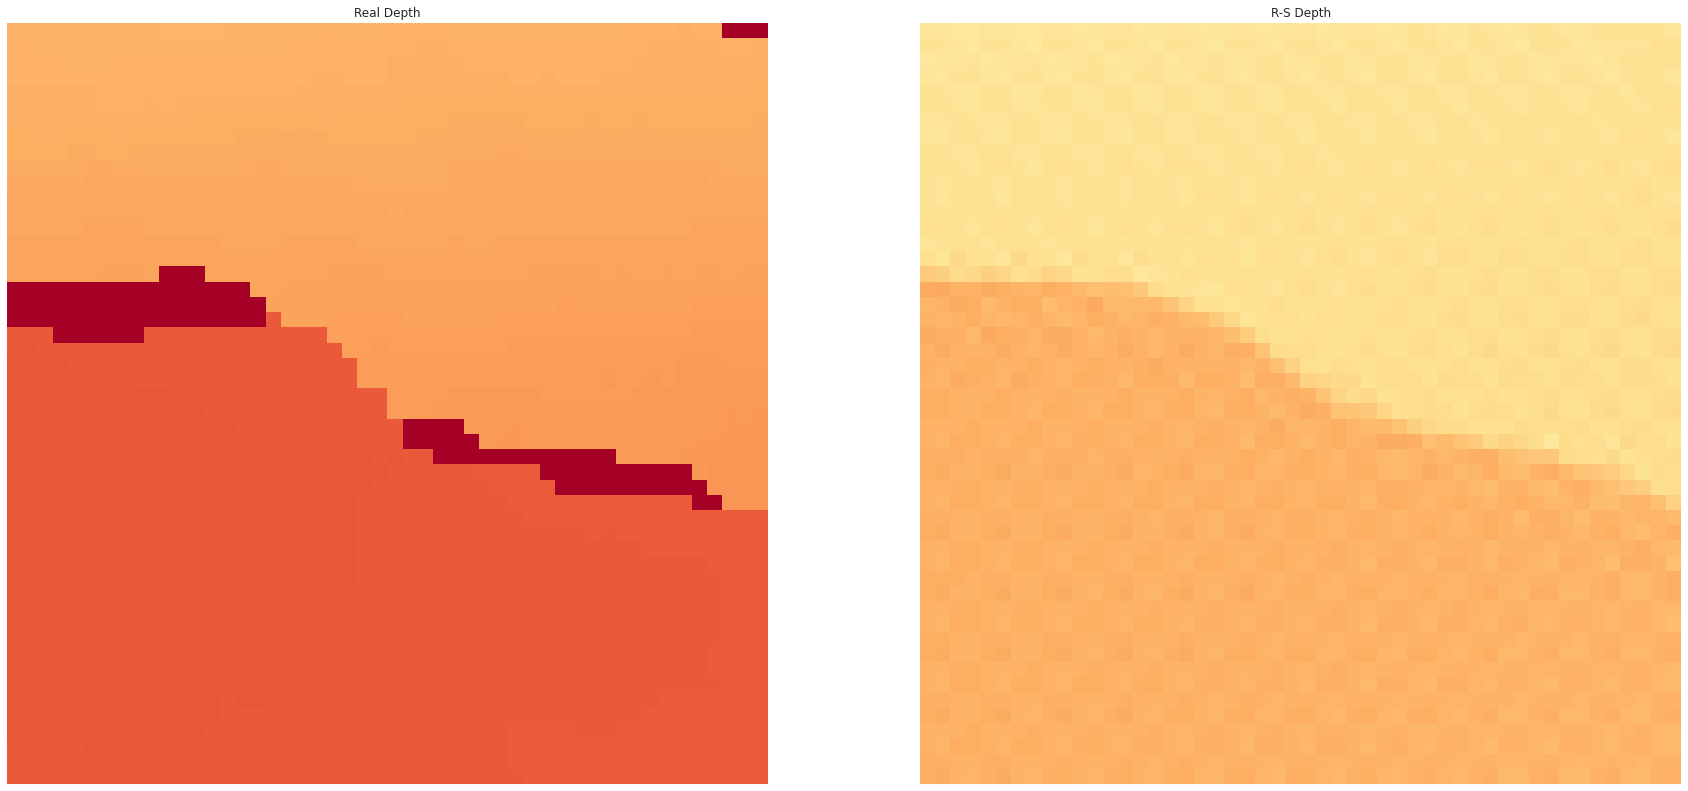

In [15]:
vis.plot_crop(model.get_current_vis(), 100,150, 300,350)

### Upconv+Transposeconv

In [7]:
opt = TestOptions().parse(isCodeCheck=True)
vis = Visualizer(opt)
dataset = create_dataset(opt)
opt.name = 'pairup_dilatedconv_old_weight'
model = create_model(opt)
model.setup()

----------------- Options ---------------
                attention: False                         
               batch_size: 2                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
             data_shuffle: False                         
                 dataroot: /all_data/hdd/un_depth/semi/sample
             dataset_mode: semi_cycle                    
                  dropout: True                          
                    epoch: last                          
                 gan_mode: vanilla                       
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
           input_nc_depth: 1                             
             input_nc_img: 3                             
                  isTrain: False                         	[default: None]
          

In [8]:
L1_loss = []
for data in tqdm(dataset):
    model.set_input(data)
    model.test()
    L1_loss.append(model.get_L1_loss())
mean = np.mean(L1_loss)
std = np.std(L1_loss, ddof=1)
print(mean, 'mean')
print(std, 'std')

 50%|█████     | 2500/5000 [28:25<28:25,  1.47it/s]

0.40289272761791944 mean
0.22041240245881216 std


In [3]:
opt.phase = 'val'
dataset = create_dataset(opt)
my_iter = iter(dataset)
data = next(my_iter)
model.set_input(data)
model.test()
fig = vis.plot_img(model.get_current_vis())

Dataset SemiCycleDataset was created


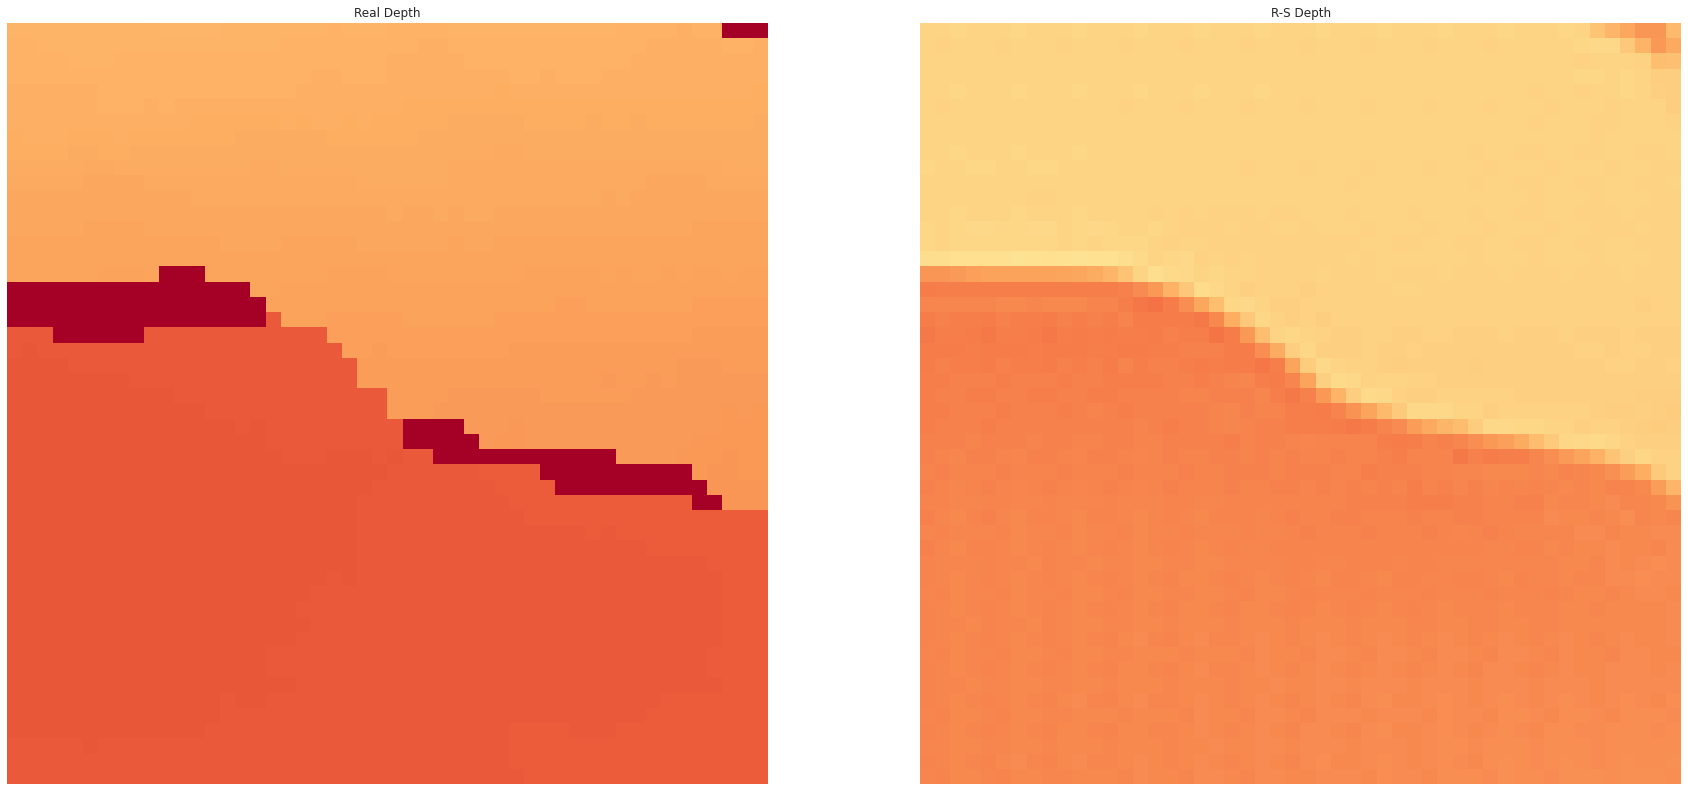

In [6]:
vis.plot_crop(model.get_current_vis(), 100,150, 300,350)